# Chapter 9

In [ ]:
!git clone https://github.com/dongheehand/DeblurGAN-tf.git

Cloning into 'DeblurGAN-tf'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (80/80), 23.91 MiB | 40.94 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
%env PYTHONPATH = # /env/python


env: PYTHONPATH=# /env/python


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh
!chmod +x Miniconda3-4.3.31-Linux-x86_64.sh
!./Miniconda3-4.3.31-Linux-x86_64.sh -b -f -p /usr/local
!conda update conda

--2023-09-24 09:19:54--  https://repo.anaconda.com/miniconda/Miniconda3-4.3.31-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57669415 (55M) [application/x-sh]
Saving to: ‘Miniconda3-4.3.31-Linux-x86_64.sh’

Miniconda3-4.3.31-L 100%[===================>]  55.00M   141MB/s    in 0.4s    

2023-09-24 09:19:55 (141 MB/s) - ‘Miniconda3-4.3.31-Linux-x86_64.sh’ saved [57669415/57669415]

PREFIX=/usr/local
installing: python-3.6.3-h6c0c0dc_5 ...
Python 3.6.3 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.0-h9df7e31_2 ...
installing: openssl-1.0.2n-hb7f436b_0 ...
instal

In [ ]:
!conda create -n myenv python=3.6

Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.08.22 |       h06a4308_0         123 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    ld_impl_linux-64-2.38      |       h1181459_1         654 KB
    libffi-3.3                 |       he6710b0_2          50 KB
    libgcc-ng-11.2.0  

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
pip install scikit-image==0.13.1
pip install Pillow==5.0.0
pip install numpy==1.14.5
pip install tensorflow==1.10.1

     |████████████████████████████████| 35.8 MB 1.5 MB/s 
     |████████████████████████████████| 3.1 MB 45.5 MB/s 
     |████████████████████████████████| 1.6 MB 47.3 MB/s 
     |████████████████████████████████| 11.5 MB 42.0 MB/s 
     |████████████████████████████████| 4.4 MB 52.2 MB/s 
     |████████████████████████████████| 25.9 MB 45.8 MB/s 
     |████████████████████████████████| 1.1 MB 66.0 MB/s 
     |████████████████████████████████| 14.8 MB 40.6 MB/s 
     |████████████████████████████████| 103 kB 64.2 MB/s 
     |████████████████████████████████| 247 kB 54.6 MB/s 
     |████████████████████████████████| 5.9 MB 3.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.3.4 requires pillow>

In [ ]:
!gdown 1Sg0LQUAsf3wfDQNMwUKKM2O-uJMWQWxw

Downloading...
From: https://drive.google.com/uc?id=1Sg0LQUAsf3wfDQNMwUKKM2O-uJMWQWxw
To: /content/DeblurGAN_model.tar
100% 220M/220M [00:04<00:00, 51.2MB/s]


In [ ]:
!tar -xvf DeblurGAN_model.tar

./
./DeblurrGAN_last.data-00000-of-00001
./DeblurrGAN_last.index


In [ ]:
#python3 main.py --mode test_only --pre_trained_model /content/DeblurrGAN_last.data-00000-of-00001 --test_Blur_path /content/blur_00.png

In [ ]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
python /content/DeblurGAN-tf/main.py --mode test_only --pre_trained_model /content/DeblurrGAN_last --test_Blur_path /content/pre_processed_images/

Build model!
saved model is loaded for test only!
model path is /content/DeblurrGAN_last


In [ ]:
!mkdir test_image

mkdir: cannot create directory ‘test_image’: File exists


In [ ]:
!mkdir pre_processed_images

In [ ]:
!mkdir result

In [ ]:
!ls /content/test

blurry.png


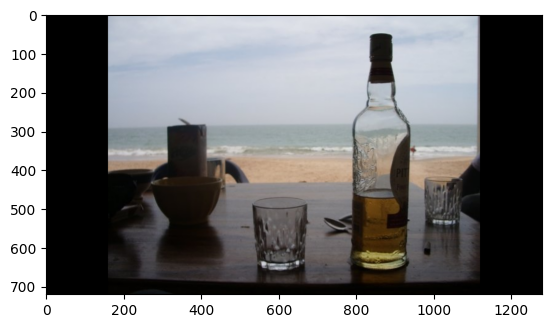

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib.pyplot import imshow

for img in sorted(os.listdir("/content/test_image")):
  image = Image.open('/content/test_image/' + img )
  image = np.array(image)
  image = image[...,:3]
  image = np.asarray(tf.image.resize_with_pad(
      image,
      720,
      1280,
      method=tf.image.ResizeMethod.BILINEAR,
      antialias=False
  )).astype(np.uint8)
  image = Image.fromarray(image)
  image.save("/content/pre_processed_images/"+img.split('.')[0]+'.png')
  imshow(image)


In [ ]:
!rm -r /content/test_image/.ipynb_checkpoints
!rm -r /content/pre_processed_images/.ipynb_checkpoints